# Actividad Distribuciones de probabilidad

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

#### 1. Considerar un dado de 20 caras para caluclar las siguientes probabilidades:

In [2]:
# P(obtener un número entre 6 y 9)
dado=stats.randint(low=1, high=21) #aleatorios enteros
dado

In [86]:
#TIPS
# CDF: Mayor o igual (inverso)/ Menor o igual
# PMF: Igual

In [3]:
dado.pmf(6)

0.05

In [4]:
dado.pmf(7)

0.05

In [5]:
dado.pmf(8)

0.05

In [6]:
dado.pmf(9)

0.05

In [7]:
dado.pmf([6,7,8,9]).sum()

0.2

In [8]:
# P(obtener al menos 12)
1-(dado.cdf(11))

0.44999999999999996

In [9]:
# P(obtener 3 o menos)
dado.cdf(3)

0.15

In [10]:
# Lanzamiento de dado n veces
for i in range(10):
    print("lanzamiento #",i,":",dado.rvs())

lanzamiento # 0 : 16
lanzamiento # 1 : 11
lanzamiento # 2 : 4
lanzamiento # 3 : 20
lanzamiento # 4 : 5
lanzamiento # 5 : 7
lanzamiento # 6 : 2
lanzamiento # 7 : 11
lanzamiento # 8 : 4
lanzamiento # 9 : 13


(0.0, 1.0)

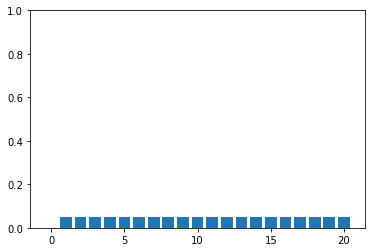

In [11]:
# Graficar función de densidad de probabilidad (PMF)
plt.bar(range(0,21),dado.pmf(range(0,21)));
plt.ylim([0,1])

#### 2. El apagador de una casa funciona 1 de 5 veces y al accionarlo 15 veces calcular la probabilidad de:

In [12]:
# P (Funcione 9 veces)
binomial=stats.binom(n=15, p=0.2)
binomial.pmf(9)

0.0006717597286400011

In [13]:
# P (Funcione menos de 4 veces)
binomial.cdf(3)

0.6481621045739516

In [14]:
binomial.pmf(1)+binomial.pmf(2)+binomial.pmf(3)+binomial.pmf(0)

0.6481621045739525

In [15]:
# P (Funcione 3 o más veces)
1-(binomial.cdf(4))

0.16423372393676816

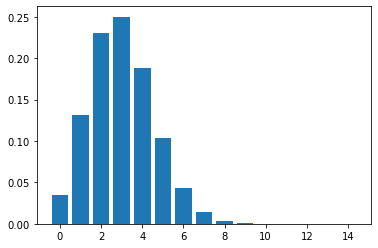

In [16]:
# Graficar función de densidad de probabilidad (PMF)
plt.bar(range(0,15),binomial.pmf(range(0,15)));

#### 3. En una línea de producción se estrellan 3 vitrales por hora, calcular las probabilidad de:

In [17]:
# P (Estrellar un vitral por hora)
poisson=stats.poisson.pmf(1,3)
poisson

0.14936120510359185

In [18]:
# P (Entre 4 y 7 por hora)
stats.poisson.pmf(4,3)+stats.poisson.pmf(5,3)+stats.poisson.pmf(6,3)+stats.poisson.pmf(7,3)

0.34086360736141147

In [19]:
# P (Estrellar menos de 6 por hora)
stats.poisson.cdf(5,3)

0.9160820579686966

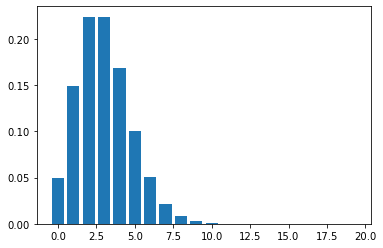

In [20]:
# Graficar función de densidad de probabilidad (PMF)
k = np.array(range(0,20))
lambda_ = 3
plt.bar(k, 
            lambda_**k*np.exp(-lambda_)/sp.special.factorial(k));

#### 4. El documento sqft contiene el área en pies cuadrados de un conjunto de hogares, calcular

In [21]:
# P (Una casa posea 830 +/- 25 sqft)
df=pd.read_csv("sqft.csv")
df[(df["sqft"]>805)&(df["sqft"]<855)].count()/len(df)*100

sqft    0.373
dtype: float64

In [22]:
# P (Una casa posea más de 3000 sqft)
df[(df["sqft"]>3000)].count()/len(df)*100

sqft    0.0
dtype: float64

In [23]:
# P (Una casa posea menos de 275 sqft)
df[(df["sqft"]<275)].count()/len(df)*100

sqft    0.002
dtype: float64

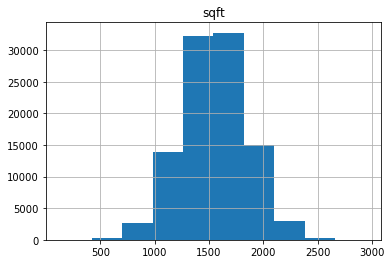

In [24]:
# Graficar función de densidad de probabilidad (PMF)
df.hist();

#### 5.1 Un mecanógrafo comete una media de 2 errores por página, ¿cuál es la probabilidad de que una página no tenga errores?

In [25]:
stats.poisson.pmf(0,2)

0.1353352832366127

In [26]:
#Hecho como en clase:
#Mecanógrafo
meca=stats.poisson(2)
meca.pmf(0)

0.1353352832366127

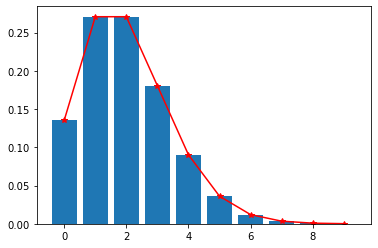

In [27]:
plt.bar(range(0,10),meca.pmf(range(0,10)))
plt.plot(range(0,10),meca.pmf(range(0,10)),marker='*',c="r");

#### 5.2 Los componentes se embalan en cajas de 20. La probabilidad de que un componente individual sea defectuoso es de 10%

In [28]:
# P de que una caja contenga exactamente 2 componentes defectuosos. 20 comp independientes con un estado binario
caja=stats.binom(n=20, p=0.1)
caja.pmf(2)

0.28517980706429846

In [29]:
# P de que una caja contenga máximo 2 componentes defectuosos
caja.cdf(2)

0.6769268051894659

In [30]:
# Encuentra todas las posibilidades de que haya al menos 2 componentes defectuosos:
1-caja.cdf(1)

0.6082530018748321

#### 5.3 Los clientes llegan a un bar local a un ritmo de 30 por hora. ¿cuál es la probabilidad de que el portero pueda tomarse un descanso de tres minutos para ir al baño sin perder al siguiente cliente?

In [31]:
ppm=30/1*(1/60)
ppm

0.5

In [32]:
bar=stats.expon(ppm)
bar

In [33]:
1-stats.expon.cdf(3,scale=0.5) #ver esta parte del video de nuevo

0.0024787521766663767

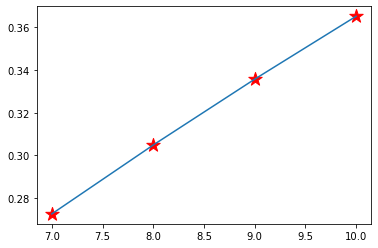

In [34]:
#De cada generación se graduan 22, cuál es la probabilidad de que se graduen 10?
bar2=stats.expon(0,scale=22) #qué tan a la derecha o izquierda movería la distribución es el loc
plt.plot(range(7,11),bar2.cdf(range(7,11)))
plt.scatter(range(7,11),bar2.cdf(range(7,11)),c="r",marker="*",s=200)

In [35]:
#Continuando con este ejemplo:
estud=stats.expon.cdf(10,scale=22) #scale es la media P. Aprueben 10 o menos
estud

0.3652635810597182

In [36]:
#Volviendo al problema del ejercicio. Existen dos maneras de realizarlo:
def generate_label(param_names, param_values):
    '''Generate parameter labels for the legend'''
    params = ["{}={}".format(name,value) for name, value in zip(param_names, param_values)
              if name is not None]
    return ", ".join(params)

def draw_pmf(ax, dist, param_names, param_values, xpts):
    '''draw a pmf as part of a set of pmfs'''
    label = generate_label(param_names, param_values)
    ax.bar(xpts, 
           [dist(*param_values).pmf(x) for x in xpts], 
           label=label, 
           align='center',
           color='grey')
    
def draw_pmf_grid(dist, param_names, param_values, xpts, height=2.5):
    '''draw several pmfs for for various parameter values for a given distribution'''
    figsize = (12, height * len(param_values))
    fig = plt.figure(figsize=figsize)
    for i, pv in enumerate(param_values, start=1):
        if i == 1:
            ax = ax1 = fig.add_subplot(len(param_values), 1, i)
        else:
            ax = fig.add_subplot(len(param_values), 1, i, sharey=ax1)
        draw_pmf(ax, dist, param_names, pv, xpts)
        ax.set_ylabel('p')
        ax.set_ylim(bottom=0)
        ax.set_xlim(left=min(xpts) - 0.5, right=max(xpts) + 0.5)
        ax.legend(frameon=True)
        plt.xticks(np.arange(min(xpts), np.ceil(max(xpts))+1)) ## force integer ticks
    plt.show()
    
def draw_pdf(ax, dist, param_names, param_values, xpts):
    '''Dibujar una PDF'''
    label = generate_label(param_names, param_values)
    ax.plot(xpts, [dist(*param_values).pdf(x) for x in xpts], label=label, linewidth=2)
    
def draw_cdf(ax, dist, param_names, param_values, xpts):
    label = generate_label(param_names, param_values)
    ax.plot(xpts, [dist(*param_values).cdf(x) for x in xpts], label=label, linewidth=2)  

def draw_continuous_distributions(dist, param_names, param_values, xmin, xmax, figsize=(8,6)):
    '''Dibujar varias PDFs'''   
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    xpts = np.linspace(xmin, xmax, 200)
    for pv in param_values:
        draw_cdf(axs[0], dist, param_names, pv, xpts)
        draw_pdf(axs[1], dist, param_names, pv, xpts)
    axs[0].set_ylabel('Distribución Acumulada')
    axs[1].set_ylabel('Densidad de Probabilidad')
    axs[0].legend()
    axs[1].legend()

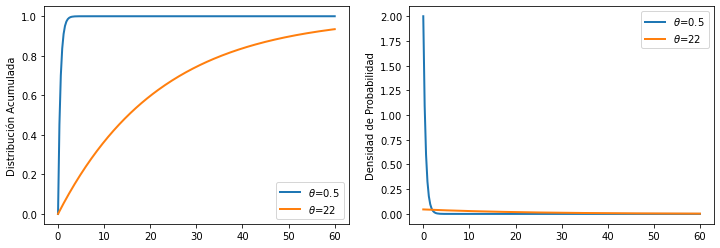

In [37]:
draw_continuous_distributions(stats.expon, (None,r"$\theta$"),[(0,0.5),(0,22)], 0,60) #0.5 por la tasa de las personas

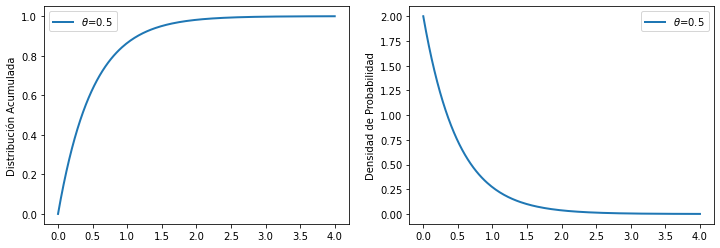

In [38]:
#Ejercicio del Bar
draw_continuous_distributions(stats.expon, (None,r"$\theta$"),[(0,0.5)], 0,4)

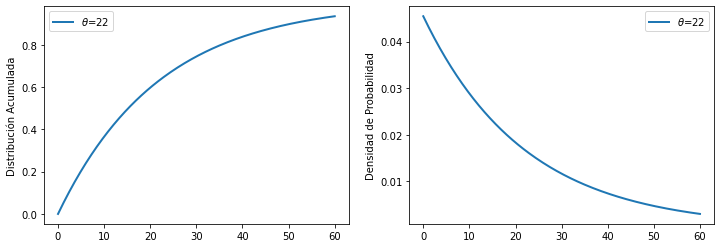

In [39]:
#Ejemplo de los estudiantes:
draw_continuous_distributions(stats.expon, (None,r"$\theta$"),[(0,22)], 0,60)

In [40]:
stats.expon.cdf(3,scale=0.5) # P de que llegue alguien en t<=3 min

0.9975212478233336

In [41]:
#RESPUESTA DEL EJERCICIO 5.3 (Bar):
1-stats.expon.cdf(3,scale=0.5) #P de que no llegue nadie / que pueda tomarse un descanso

0.0024787521766663767

#### 6.1 Tienes que encontrar a una persona alta, de al menos 1,80 m. El 8% de la población mide 1,80 o más, y la gente pasa de media dos veces por minuto. Si esperas en la acera, ¿cuál es la probabilidad de que tengas que esperar más de diez minutos para conseguir unas galletas?

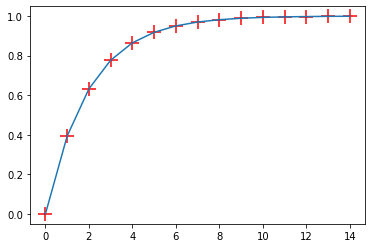

In [42]:
# P de esperar 10 min o más:
p_alta=stats.expon(0,scale=2) #Definición (2 veces por minuto). Es cero porque no te está diciendo que empieza en el min 10 o x
plt.plot(range(0,15),p_alta.cdf(range(0,15)))
plt.scatter(range(0,15),p_alta.cdf(range(0,15)),c="r",marker="+",s=200);

In [43]:
1-p_alta.cdf(10) #aquí asumes que cualquier persona que pase tiene la estatura, se tiene que agregar el 0.08

0.006737946999085476

In [44]:
(1-p_alta.cdf(10))*0.08

0.000539035759926838

#### 6.2 Un pasajero apresurado llegará varios minutos tarde a un vuelo programado para las 10 am. Sin embargo es posible que llegue al vuelo, ya que el embarque siempre se permite hasta las 10:10 am, y a veces se permite hasta las 10:30 am. Suponiendo que la hora de finalización de intervalo de embarque se distribuye uniformemente sobre los límites anteriores, encuentre la probabilidad de que el pasajero llegue a su vuelo, suponiendo que llega a la puerta de embarque a las 10:25.

In [45]:
#Vuelo
vuelo=stats.randint(low=10,high=30) #normalmente se va a las 10:10, pero en ocasiones a las 10:30. el 0 equivale a las 10:00

In [46]:
# P de que a las 10:25 todavia alcance el vuelo
vuelo.pmf(25)

0.05

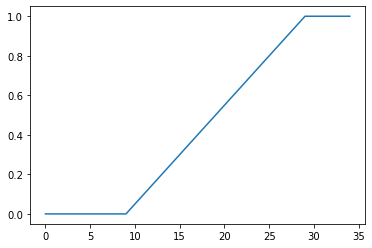

In [47]:
plt.plot(range(0,35),vuelo.cdf(range(0,35)));

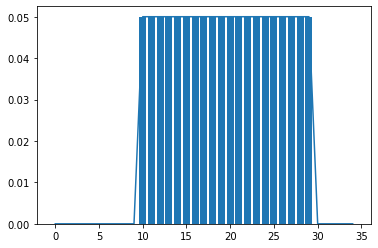

In [49]:
#¿Cómo podemos estar seguros que la generación de números aleatorios es una distribución uniforme?
#-Haciendo el gráfico del PMF
plt.plot(range(0,35),vuelo.pmf(range(0,35)));
plt.bar(range(0,35),vuelo.pmf(range(0,35)));
#-Del 10 al 30 tienen exactamente la misma probabilidad. Una distribución uniforme en el CDF siempre tendrá esa elevación lineal

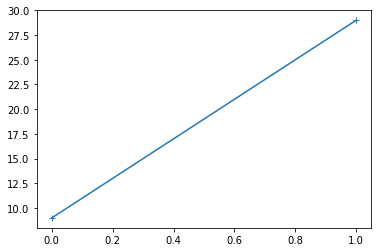

In [51]:
plt.plot(range(0,35),vuelo.ppf(range(0,35)),marker="+"); #PPF es función de punto de probabilidad. El eje y son los minutos

In [55]:
#Solución con Stats.Uniform
vuelo2=stats.uniform(loc=10,scale=20) #la media es loc porque en promedio se va a las 10:10
#SCALE ES A PRUEBA Y ERROR, es un punto en el que puede haber outliers.

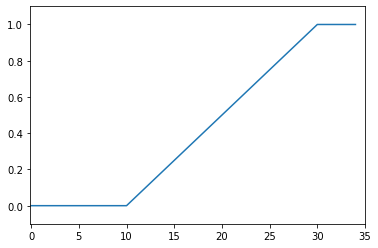

In [59]:
plt.plot(range(0,35),vuelo2.cdf(range(0,35)));
plt.ylim([-0.1,1.1]);
plt.xlim([-0.1,35]); #que se puede hasta 35 no es verdad en el problema (scale con 30).
#Se cambió el scale a 20 (prueba y error) para llegar a la gráfica que corresponde.

In [60]:
#Ver si coincide valor con el del método de randint
vuelo2.pdf(25)

0.05

#### 7.1 Tu gato empieza a pedir la cena a las 3:30 todos los días, y sospechas que maúlla a un ritmo fijo. Has observado que aproximadamente una quinta parte de las veces tu gato no maúlla hasta las 3:40, lo que te da 10 minutos inesperados de tranquilidad. ¿Cuál es la probabilidad de que tu gato te deje tranquilo durante 30 minutos?

In [61]:
gato=stats.poisson(0.2)

In [62]:
gato.pmf(3) #que no maulle 3 veces seguidas (30 min)

0.0010916410041039767

#### 7.2 De alguna manera, has acabado con dos tipos de tenedores. Están los tenedores buenos, que son grandes y sirven para un bocado sano, pero también están estos pequeños y finos que no entiendes muy bien para qué sirven, probablemente deberías deshacerte de ellos. Necesitas dos tenedores para ti y tu pareja, y coge un puñado de 5. Si hay 14 tenedores en el cajón, de los cuales la mitad son del tipo bueno, ¿cuál es la probabilidad de que tengas al menos los dos tenedores buenos que necesitas?

In [64]:
tenedores = stats.nhypergeom(M=14, n=7, r=5) #n es el número de los que cumplen con el requisito y r es la muestra.

In [65]:
tenedores.pmf(2)

0.0917832167832168

In [66]:
tenedores.pmf(3)

0.15297202797202797

In [67]:
tenedores.pmf(4)

0.2039627039627041

In [68]:
tenedores.pmf(5)

0.2202797202797206

In [69]:
tenedores.pmf([2,3,4,5]).sum()

0.6689976689976695

#### 8.1 De los alumnos de una clase, el 60% son genios, el 70% aman el chocolate y el 40% entran en ambas categorías. Determina la probabilidad de que un alumno seleccionado al azar no sea ni un genio ni un amante del chocolate.

In [70]:
#genio=.6
#chocolate=.7
#both=.4
p_alumno=(1-.7)*(1-.6)
p_alumno

0.12000000000000002

In [75]:
#P(A) = 60% Genios
#P(B) = 70% AC

#P(AnB)=42%
#P Genio que no ama el chocolate
#P(A|B)= P(AnB)/P(B)
#
P=0.4*(0.7-0.3)
P

0.16

#### 8.2 Se lanza tres veces, de forma independiente, un dado justo de 6 caras. ¿Qué es más probable: una suma de 11 o una suma de 12?

In [78]:
suma11=[]
suma12=[]

for i in range(1,7):
    for j in range(1,7):
        for k in range(1,7):
            suma=i+j+k
            if suma==11:
                suma11.append(suma)
            elif suma==12:
                suma12.append(suma)

total=6**3 #tres lanzamientos con un dado de 6 caras
prob11=np.round(len(suma11)/total*100,1)
prob12=np.round(len(suma12)/total*100,1)

if prob11>prob12:
    print(f'Es más probable obtener la suma de 11: {prob11}% que la suma de 12: {prob12}%')
else:
    print(f'Es más probable obtener la suma de 12: {prob12}% que la suma de 11: {prob11}%')

Es más probable obtener la suma de 11: 12.5% que la suma de 12: 11.6%


#### 8.3 Hay que repartir 90 alumnos al azar en 3 clases de igual tamaño. Joe y Jane son dos de los estudiantes. ¿Cuál es la probabilidad de que acaben en la misma clase?

In [79]:
#Estudiantes
total=90
grupos=3
EpC=total/grupos
JJ=2

def factorial(n):
    if n==0:
        res=1
    else:
        res=n*factorial(n-1)
    return res

In [81]:
combinaciones=factorial(total)/(factorial(total-EpC)*factorial(EpC))
combinaciones

6.731329745065802e+23

In [83]:
DosJ=factorial(total-JJ)/(factorial((total-JJ)-(EpC-JJ))*factorial(EpC-JJ))
DosJ

7.311182120108923e+22

In [84]:
print(f'La probabilidad de que Joe y Jane estén juntos es {np.round(3*(DosJ/combinaciones)*100,2)}%')

La probabilidad de que Joe y Jane estén juntos es 32.58%


#### 8.4 Se reparte una baraja bien barajada de 52 cartas a 4 jugadores. Encuentra la probabilidad de que cada uno de los jugadores obtenga un as.

In [85]:
total=52
manos=4
CpM=total/manos
As=1
combinaciones=factorial(total)/(factorial(manos)*factorial(total-manos))
As=factorial(CpM)/(factorial(As)*factorial(CpM-As))
print(f'es:{np.round((As**manos/combinaciones)*100,2)}%')

es:10.55%
